In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
path='/content/drive/MyDrive/Chest_X-ray_Dataset/train/'

In [ ]:
print(os.listdir(path))

['COVID19', 'PNEUMONIA', 'NORMAL']


In [ ]:
for i in os.listdir(path):
  print(i,len(os.listdir(path+i)))

COVID19 460
PNEUMONIA 3418
NORMAL 1266


In [ ]:
import keras
import keras.utils as image
import matplotlib.pyplot as plt

In [ ]:
img = image.load_img(path+'PNEUMONIA/PNEUMONIA(3417).jpg')

In [ ]:
img = image.img_to_array(img)

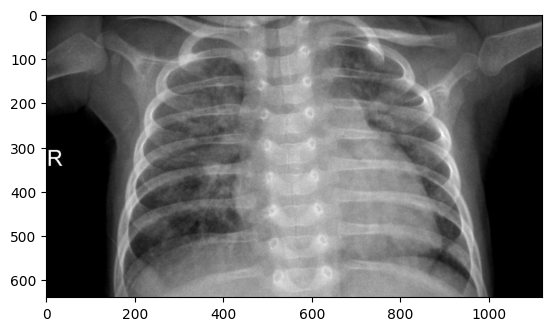

In [ ]:
plt.imshow(img/255)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_X=ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True
)

In [ ]:
train_gen=train_X.flow_from_directory(path,
                                      target_size=(250,250),
                                      batch_size=30,
                                      class_mode='categorical')

Found 5144 images belonging to 3 classes.


In [ ]:
from keras.applications.resnet import ResNet101
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input,decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
resnet_model=ResNet101(weights='imagenet',include_top=False)

171446536/171446536 [==============================] - 2s 0us/step


In [ ]:
resnet_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                      

In [ ]:
for layer in resnet_model.layers:
  layer.trainable=True

In [ ]:
model_output=resnet_model.output
model_output=GlobalAveragePooling2D()(model_output)
model_output=Dense(1024,activation='relu')(model_output)
model_output=Dense(3,activation='softmax')(model_output)

In [ ]:
model= Model(inputs=resnet_model.input,outputs=model_output)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
adam=keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy','Precision','Recall'])

In [ ]:
hist=model.fit(train_gen,epochs=30)

Epoch 1/30
172/172 [==============================] - 2219s 12s/step - loss: 0.5162 - accuracy: 0.8285 - precision: 0.8475 - recall: 0.7939
Epoch 2/30
172/172 [==============================] - 198s 1s/step - loss: 0.2954 - accuracy: 0.8942 - precision: 0.9018 - recall: 0.8857
Epoch 3/30
172/172 [==============================] - 190s 1s/step - loss: 0.2436 - accuracy: 0.9100 - precision: 0.9139 - recall: 0.9061
Epoch 4/30
172/172 [==============================] - 187s 1s/step - loss: 0.2189 - accuracy: 0.9207 - precision: 0.9236 - recall: 0.9184
Epoch 5/30
172/172 [==============================] - 188s 1s/step - loss: 0.1919 - accuracy: 0.9290 - precision: 0.9314 - recall: 0.9271
Epoch 6/30
172/172 [==============================] - 189s 1s/step - loss: 0.1902 - accuracy: 0.9345 - precision: 0.9363 - recall: 0.9322
Epoch 7/30
172/172 [==============================] - 185s 1s/step - loss: 0.1783 - accuracy: 0.9372 - precision: 0.9384 - recall: 0.9353
Epoch 8/30
172/172 [============